In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
np.random.seed(19680801)

In [20]:
data=pd.read_csv("D:\Data AQA\mumbai_multi.csv")

In [21]:
data.head(210)

,St_no,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Benzene,Ozone,CH4,CO2,BlackCarbon
0,1,28.85,289.36,70.61,58.47,174.30,3.01,0.20,5.00,13.72,NaN,420.08,NaN
1,1,90.91,266.66,59.70,51.01,153.50,3.24,0.35,5.00,8.06,NaN,417.61,NaN
2,1,26.19,237.63,76.37,92.88,157.16,8.28,1.11,5.00,22.12,NaN,426.32,NaN
3,1,27.24,243.11,86.95,45.14,185.24,3.26,0.76,5.00,8.11,NaN,433.62,NaN
4,1,27.93,180.92,62.56,68.73,131.72,7.24,1.80,5.00,19.06,NaN,323.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1,21.60,93.22,5.98,2.82,5.28,0.54,0.28,4.97,11.69,NaN,346.57,NaN
206,1,17.85,70.55,6.13,5.53,5.53,0.40,0.66,5.00,12.32,NaN,316.19,NaN
207,1,18.84,68.19,6.84,3.26,5.77,0.33,0.57,5.02,14.14,NaN,315.91,NaN
208,1,24.25,63.05,7.34,5.75,6.40,15.15,0.52,5.02,34.50,NaN,371.83,NaN


In [22]:
data['PM10']=data['PM10'].fillna(data['PM10'].median())
data['NO']=data['NO'].fillna(data['NO'].median())
data['NO2']=data['NO2'].fillna(data['NO2'].median())
data['NH3']=data['NH3'].fillna(data['NH3'].median())
data['SO2']=data['SO2'].fillna(data['SO2'].median())
data['CO']=data['CO'].fillna(data['CO'].median())
data['Benzene']=data['Benzene'].fillna(data['Benzene'].median())
data['Ozone']=data['Ozone'].fillna(data['Ozone'].median())

In [24]:
data1=pd.DataFrame(data.iloc[:,0:10])
data1

,St_no,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Benzene,Ozone
0,1,28.85,289.36,70.61,58.47,174.30,3.01,0.20,5.00,13.72
1,1,90.91,266.66,59.70,51.01,153.50,3.24,0.35,5.00,8.06
2,1,26.19,237.63,76.37,92.88,157.16,8.28,1.11,5.00,22.12
3,1,27.24,243.11,86.95,45.14,185.24,3.26,0.76,5.00,8.11
4,1,27.93,180.92,62.56,68.73,131.72,7.24,1.80,5.00,19.06
...,...,...,...,...,...,...,...,...,...,...
12728,17,76.68,244.83,9.71,34.67,8.92,20.31,1.89,11.48,0.79
12729,17,86.49,234.80,9.14,30.31,9.43,20.84,1.84,11.48,0.79
12730,17,45.57,127.84,5.26,23.24,7.95,20.63,1.56,11.48,0.79
12731,17,22.87,183.29,9.45,31.19,9.06,20.34,1.90,11.48,0.79


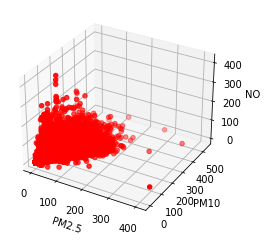

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(data1["PM2.5"],data1["PM10"],data1["NO"],color="red")
ax.set_xlabel("PM2.5")
ax.set_ylabel("PM10")
ax.set_zlabel("NO")
plt.show()

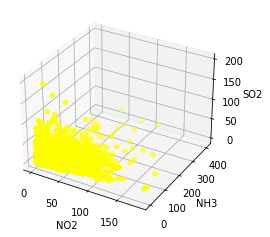

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(data1["NO2"],data1["NH3"],data1["SO2"],color="yellow")
ax.set_xlabel("NO2")
ax.set_ylabel("NH3")
ax.set_zlabel("SO2")
plt.show()

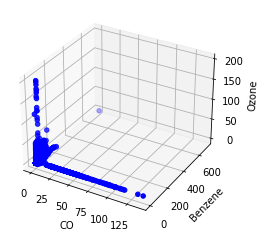

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(data1["CO"],data1["Benzene"],data1["Ozone"],color="Blue")
ax.set_xlabel("CO")
ax.set_ylabel("Benzene")
ax.set_zlabel("Ozone")
plt.show()

In [28]:
#enerating training and testing data from our data:
# We are using 80% data for training.
train = data1[:(int((len(data1)*0.8)))]
test = data1[(int((len(data1)*0.8))):]

In [30]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["PM2.5"]])
train_y = np.array(train[["PM10"]])
regr.fit(train_x,train_y)

LinearRegression()

Text(0.11410640661270852, 0.015287359751546258, 'NO')

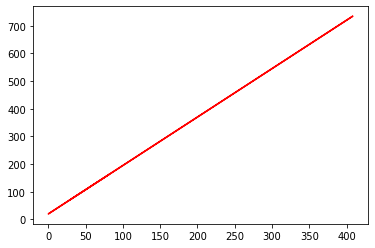

In [31]:
ax.scatter(data1["PM2.5"],data["PM10"],data["NO"],color="red")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
ax.set_xlabel("PM2.5")
ax.set_ylabel("PM10")
ax.set_zlabel("NO")

To find the coefficient and intercept

In [32]:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_)

coefficients :  [[1.75023683]]
Intercept :  [19.96377934]


Estimating the value of engine size

In [33]:
# Predicting values:
# Function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Checking various accuracy:
from sklearn.metrics import r2_score 
test_x = np.array(test[['PM2.5']]) 
test_y = np.array(test[['PM10']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 25.54
Mean sum of squares (MSE): 1226.90
R2-score: 0.61


In [34]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["NO2"]])
train_y = np.array(train[["NH3"]])
regr.fit(train_x,train_y)

LinearRegression()

Text(0.11410640661270852, 0.015287359751546258, 'SO2')

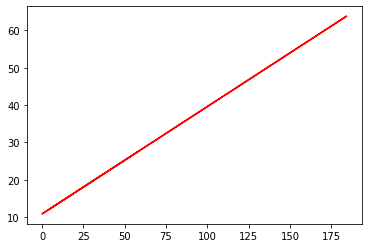

In [39]:
ax.scatter(data1["NO2"],data["NH3"],data["SO2"],color="red")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
ax.set_xlabel("NO2")
ax.set_ylabel("NH3")
ax.set_zlabel("SO2")

To find the coefficient and intercept

In [40]:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_)

coefficients :  [[0.28732173]]
Intercept :  [10.87145541]


Estimating the value of engine size

In [41]:
# Predicting values:
# Function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Checking various accuracy:
from sklearn.metrics import r2_score 
test_x = np.array(test[['NO2']]) 
test_y = np.array(test[['NH3']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 16.45
Mean sum of squares (MSE): 997.44
R2-score: -63.27


In [43]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["CO"]])
train_y = np.array(train[["Benzene"]])
regr.fit(train_x,train_y)

LinearRegression()

Text(0.11410640661270852, 0.015287359751546258, 'Ozone')

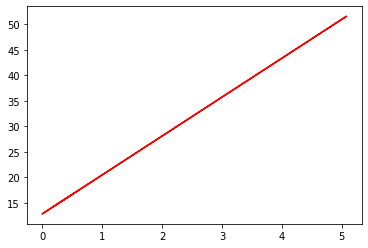

In [44]:
ax.scatter(data1["CO"],data["Benzene"],data["Ozone"],color="red")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
ax.set_xlabel("CO")
ax.set_ylabel("Benzene")
ax.set_zlabel("Ozone")

In [45]:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_)

coefficients :  [[7.61357795]]
Intercept :  [12.8632943]


In [46]:
# Predicting values:
# Function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Checking various accuracy:
from sklearn.metrics import r2_score 
test_x = np.array(test[['CO']]) 
test_y = np.array(test[['Benzene']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 57.31
Mean sum of squares (MSE): 19307.28
R2-score: -0.17
